# Droplets

## Different morphologies of the droplet state

Let us consider the equilibrium droplet state, _i.e._, $\alpha<0$ and $-\sqrt{\frac{-\alpha}{\beta}}<\phi_0<\sqrt{\frac{-\alpha}{\beta}}$.
For a fixed value of $\alpha$, depending on the global average density $\phi_0$, we can have 3 different types of droplet state.
For $\phi_0<0$, we have a liquid droplet surrounded by vapour phase.
For $\phi_0>0$, we have a vapour bubble surrounded by liquid phase.
Finally for $\phi_0=0$, the liquid droplet forms a strip, as we can see from the figure below.

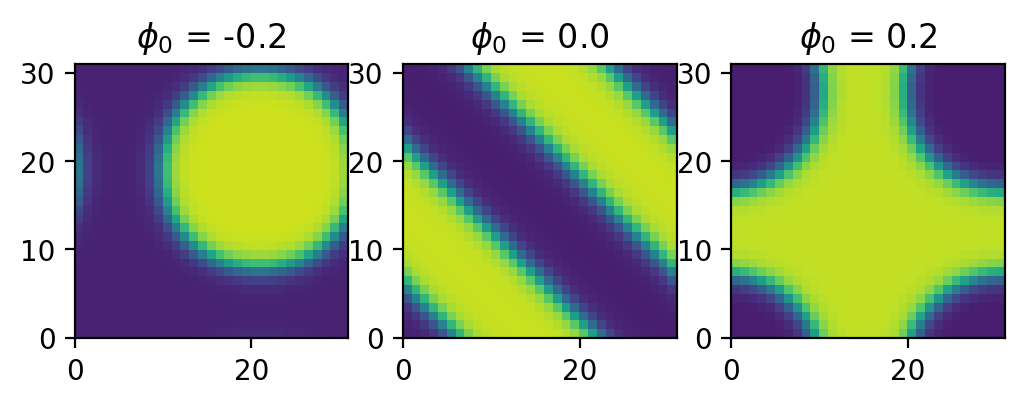

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# parameters
dx = 1.0  # normally dx = dy
dt = 0.01 

Nx = 32  # normally the total number of lattice = 2^(some integer)
Ny = 32  # this is required for Fourier transform later
Nt = 1000000

alpha, beta, kappa = -1.0, 1.0, 1.0
phi0 = 0.0

# array of cartesian coordinates (needed for plotting)
x = np.arange(0, Nx)*dx
y = np.arange(0, Ny)*dx
y, x = np.meshgrid(y, x) 

# create a phi-matrix of size Nx by Ny (similarly for mu-matrix)
phi = np.zeros((Nx, Ny))  # phi at current timestep
mu = np.zeros((Nx, Ny))

# method to calculate the laplacian
def laplacian(phi):
    # axis=0 --> roll along x-direction
    # axis=1 --> roll along y-direction
    laplacianphi = \
        (np.roll(phi,+1,axis=0) - 2.0*phi + np.roll(phi,-1,axis=0))/(dx*dx) \
      + (np.roll(phi,+1,axis=1) - 2.0*phi + np.roll(phi,-1,axis=1))/(dx*dx)

    return laplacianphi

# takes in phi at time n and outputs phi at time n+1
def update(phi):
    mu = alpha*phi + beta*phi*phi*phi - kappa*laplacian(phi)
    phi = phi + dt*laplacian(mu)
    
    return phi

# plot configurations of phi0, phi1, phi2
def plot(phi0, phi1, phi2, label0, label1, label2):
    # initialize figure and movie objects
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(6,2)) 

    ax1.set_title(label0)
    ax1.set_aspect('equal')
    colormap = ax1.pcolormesh(x, y, phi0, shading='auto', vmin=-1.2, vmax=1.2)

    ax2.set_title(label1)
    ax2.set_aspect('equal')
    colormap = ax2.pcolormesh(x, y, phi1, shading='auto', vmin=-1.2, vmax=1.2)

    ax3.set_title(label2)
    ax3.set_aspect('equal')
    colormap = ax3.pcolormesh(x, y, phi2, shading='auto', vmin=-1.2, vmax=1.2)

    plt.show()
    
# run simulation for Nt timesteps for given phi0
def run(phi0):
    # initialization
    phi = phi0*np.ones((Nx, Ny)) + np.random.normal(0.0, 0.001, (Nx, Ny))

    for n in range(0, Nt, 1):
        phi = update(phi)
        
    return phi

plot(run(-0.2), run(0.0), run(0.2), "$\phi_0$ = -0.2", "$\phi_0$ = 0.0", "$\phi_0$ = 0.2")

## Flat interface ($d=1$ dimension)

As we can see from above, for $\phi_0=0$, the droplet is a strip, and the interface between the liquid and the gas phase is completely flat, reducing the problem to a one-dimensional problem $\phi(x,t)$.
In the steady (or equilibrium) state $t\rightarrow\infty$, the density profile might look something like the first plot in the figure below:

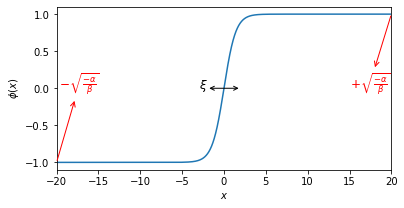

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,3)) 

alpha, beta, kappa = -1.0, 1.0, 1.0
xi = np.sqrt(2*kappa/-alpha)
x = np.arange(-20, 20, 0.001)
phi = np.tanh(x/xi)
dphidx = 1/(xi*np.cosh(x/xi)**2)
f_density = 0.5*alpha*phi**2 + 0.25*phi**4 + 0.25*kappa*dphidx**2

ax.set_xlabel('$x$')
ax.set_ylabel('$\phi(x)$')
ax.set_xlim(-20,20)

ax.plot(x, phi)

ax.annotate('', c='black',
            xy=(-2.0,0.0),  # location of the end point 
            xytext=(2.0,0.0),  # location of the start point
            arrowprops=dict(edgecolor='black', facecolor='red', arrowstyle='<->'))

ax.annotate('$\\xi$', c='black', fontsize=12, xy=(-3,0.0))

ax.annotate('$-\sqrt{\\frac{-\\alpha}{\\beta}}$', c='red', fontsize=12,
            xy=(-20,-1.0), xytext=(-19.7,0.0),  
            arrowprops=dict(edgecolor='red', facecolor='red', arrowstyle='<-'))

ax.annotate('$+\sqrt{\\frac{-\\alpha}{\\beta}}$', c='red', fontsize=12,
            xy=(20,1.0), xytext=(15,0.0),  
            arrowprops=dict(edgecolor='red', facecolor='red', arrowstyle='<-'))

plt.show()

The plot above shows the typical density field $\phi(x)$.
At $x=-\infty$, we have the gas phase, where $\phi=-\sqrt{\frac{-\alpha}{\beta}}$ and at $x=+\infty$, we have the liquid phase, where $\phi=\sqrt{\frac{-\alpha}{\beta}}$.
We then have an interface, assumed to be located at the origin $x=0$, which separates the liquid from the gas phase.
As we can see, the interface is not sharp, but rather is spread across some interfacial width $\xi$.
In real physical situations, the interfacial width is typically a few molecular lengths, however in simulations, we usually use a much wider interfacial width for numerical stability.

### Interfacial profile $\phi(x)$ and interfacial width $\xi$

In this subsection, we will derive the interfacial profile $\phi(x)$ and the interfacial width $\xi$ for a flat interface, which is effectively a one-dimensional (1d) system.

In 1d, the Hamiltonian (energy) can be written as:
\begin{equation}
H[\phi] = 
A\int_{-\infty}^\infty dx  
\underbrace{\bigg\{ \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4 + \frac{\kappa}{2}|\nabla\phi|^2 \bigg\}}_{\text{1d energy density}},
\end{equation}
where $A$ is the area of the system along $y$ and $z$ direction.
(In 1d, the system is translationally invariant along $y$ and $z$.)
The 1d energy density consists of the local term: $\frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4=f(\phi)$, which we will call $f(\phi)$, and the semi-local term $\frac{\kappa}{2}|\nabla\phi|^2$.

The steady state density, is given by the solution to the equation:
\begin{equation}
\mu(x) = \frac{\delta H}{\delta\phi} = 0 \quad\Rightarrow\quad
\frac{df}{d\phi} - \kappa\frac{d^2\phi}{dx^2} = 0,
\end{equation}
where $f(\phi) = \frac{\alpha}{2}\phi^2 + \frac{\beta}{4}\phi^4$ is the local energy density.
To solve the above equation, we multiply both sides of the equation by $d\phi/dx$ to get:
\begin{align}
\frac{df}{dx} - \kappa\frac{d^2\phi}{dx^2}\frac{d\phi}{dx} = 0 
\quad\Rightarrow\quad 
\frac{df}{dx} - \frac{\kappa}{2}\frac{d}{dx}\left(\frac{d\phi}{dx}\right)^2 = 0
\end{align}
Now we can integrate with respect to $x$ to get the __magic equation__:
\begin{equation}
f(\phi) - \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 = C, 
\end{equation}
where $C$ is the constant of integration.
The constant of integration can be found by substituting $x=\infty$ to get 
$C=f\left(\sqrt{\frac{\alpha}{\beta}}\right)=-\frac{\alpha^2}{4\beta}$.
After rearranging, we get:
\begin{align}
\frac{d\phi}{\sqrt{f(\phi) + \frac{\alpha^2}{4\beta}}} = \sqrt{\frac{2}{\kappa}} dx,
\end{align}
which we can integrate from $x=0$ to $x$.
\begin{align}
\int_{0}^{\phi(x)} \frac{d\phi}{\sqrt{f(\phi) + \frac{\alpha^2}{4\beta}}} 
= \sqrt{\frac{2}{\kappa}}x
\end{align}
Note that we can factorize:
\begin{align}
\underbrace{\frac{\alpha}{2}\phi^2 + \frac{\beta}{2}\phi^4}_{f(\phi)} + \frac{\alpha^2}{4\beta} 
= \frac{1}{4\beta}\left(\alpha+\beta\phi^2\right)^2,
\end{align}
so that the integral becomes:
\begin{align}
\int_{0}^{\phi(x)} \frac{d\phi}{\alpha + \beta\phi^2} = \sqrt{\frac{1}{2\kappa\beta}}x \quad\Rightarrow\quad
\frac{1}{\alpha}\int_{0}^{\phi(x)} \frac{d\phi}{1 - \frac{\beta}{-\alpha}\phi^2} = \sqrt{\frac{1}{2\kappa\beta}}x
\end{align}
Note that $\alpha<0$. 
Using $\frac{d}{dx}\tanh^{-1}(x)=\frac{1}{1-x^2}$, we can then solve this integral to get:
\begin{equation}
\phi(x) = \sqrt{\frac{-\alpha}{\beta}}\tanh\left(\frac{x}{\xi}\right), \quad\text{where}\quad
\xi = \sqrt{\frac{2\kappa}{-\alpha}}
\end{equation}
is the interfacial width.

### Surface tension $\gamma$

In this subsection, we will introduce the concept of surface tension $\gamma$ and derive its expression for a flat interface.
First, let us consider the energy density $f(\phi)+\frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2$, which consists of the local and semi-local terms.

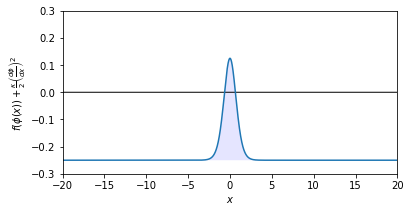

In [3]:
fig, ax = plt.subplots(figsize=(6,3)) 
ax.set_xlabel('$x$')
ax.set_ylabel('$f(\phi(x))+\\frac{\\kappa}{2}\\left(\\frac{d\phi}{dx}\\right)^2$')
ax.set_xlim(-20,20)
ax.set_ylim(-0.3,0.3)
ax.plot(x, x*0, c='black', linewidth=1)
ax.plot(x, f_density)
ax.fill_between(x, f_density, -alpha**2/(4*beta)*np.ones(np.shape(x)), facecolor='blue', alpha=0.1)
plt.show()

The plot above shows the energy density $f(\phi(x))+\frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2$ as a function of $x$ for the density profile $\phi(x)$, shown in the previous plot.
In the bulk, the energy density is mostly flat and negative, which is equal to $f\left(\sqrt{\frac{-\alpha}{\beta}}\right)=-\frac{\alpha^2}{4\beta}$.
Across the interface, the energy density goes up and then comes back to its bulk value.
The interfacial energy is defined to be excess energy across this interface, _i.e._, the shaded region in the plot above.
More specifically, the interfacial energy is defined to be:
\begin{equation}
H_{\text{interface}} = A\int_{-\infty}^{\infty}
\left\{f(\phi(x)) + \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 + \frac{\alpha^2}{4\beta} \right\}dx.
\end{equation}
Now we can refer to the __magic equation__ which we derived above, _i.e._:
\begin{equation}
f(\phi) - \frac{\kappa}{2}\left(\frac{d\phi}{dx}\right)^2 = C = -\frac{\alpha^2}{4\beta}
\end{equation}
Substituting this to $F_{\text{interface}}$, the interfacial energy becomes:
\begin{equation}
H_{\text{interface}} = A\kappa\int_{-\infty}^{\infty} \left(\frac{d\phi}{dx}\right)^2 dx.
\end{equation}
Finally the surface tension $\gamma$ is defined to be the interfacial energy per interfacial area. Thus we get:
\begin{equation}
\gamma = \kappa\int_{-\infty}^{\infty} \left(\frac{d\phi}{dx}\right)^2 dx.
\end{equation}
Substituting $\phi(x)=\sqrt{\frac{-\alpha}{\beta}}\tanh{\left(\frac{x}{\xi}\right)}$, where $\xi=\sqrt{\frac{2\kappa}{-\alpha}}$, to the above equation, we get the formula for the surface tension for this specific energy:
\begin{equation}
\gamma = \sqrt{\frac{-8\kappa\alpha^3}{9\beta^2}}.
\end{equation}

## Curved interface ($d>1$ dimension)

We will now go back to $d>1$ dimensional problems.
In general, the interface between the liquid and the gas phase is not always flat but often curved.

### Macroscopic picture of surface tension

Let us consider a liquid droplet in three-dimension and far from the boundaries (such as solid walls).
The total energy of the liquid droplet has two contributions:
\begin{equation}
H = H_{\text{bulk}} + H_{\text{interface}}.
\end{equation}
The first contribution comes the bulk energy $F_{\text{bulk}}$, which is equal to the local energy density $f(\phi)$ multiplied by the volume of the droplet $V$:
\begin{equation}
H_{\text{bulk}} \simeq f(\phi_{l}) V = \text{constant}.
\end{equation}
Note that we have assumed the density of the liquid inside the droplet, $\phi_{l}$, to be constant throughout the bulk of the droplet.
Consequently, the volume of the liquid droplet is also constant by conservation of mass.
Thus $F_{\text{bulk}}$ is constant.
The second contribution to $F$ comes from the interfacial energy $F_{\text{interface}}$ which is equal to the surface tension $\gamma$
multiplied by the surface area of the droplet $S$:
\begin{equation}
H_{\text{interface}} \simeq \gamma S.
\end{equation}
Since $\gamma>0$, the equilibrium shape of the liquid droplet, which minimizes the total energy $H$, is therefore a sphere.

The surface tension $\gamma$ can also be thought as a force per unit length.
To illustrate this, let us consider a thin film of soap, as shown in the picture below.
Technically, a soap film is an air-liquid-air interface.
Let us imagine that this two-dimensional soap film is confined between three fixed rods (black colour in the picture below) and a movable rod which can move laterally along $x$ (red colour in the picture below).
The energy stored inside this soap film is then:
\begin{equation}
H_{\text{interface}} = \gamma S = \gamma \ell x.
\end{equation}
Therefore the force by the soap film on the red rod is equal to:
\begin{equation}
F_{\text{interface}} = -\frac{dH_{\text{interface}}}{dx} = -\gamma \ell.
\end{equation}
$F_{\text{interface}}$ is negative since the direction is to the left in the picture below.
Thus a surface tension $\gamma$ is a force (per unit length) which tends to minimize the surface area of the interface.

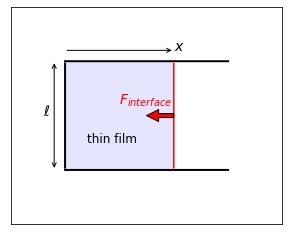

In [117]:
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(1, 4, 0.001)
x1 = np.arange(1, 3, 0.001)

ax.set_xlim(0, 5)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x1, np.ones(len(x1))*-1, np.ones(len(x1))*1, facecolor='blue', alpha=0.1)

ax.plot(x, np.ones(len(x))*-1, c='black', linewidth=2)
ax.plot(x, np.ones(len(x))*1, c='black', linewidth=2)

ax.annotate('', xy=(1,-1), xytext=(1,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(3,-1), xytext=(3,1), arrowprops=dict(edgecolor='red', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(0.8,-1), xytext=(0.8,1), arrowprops=dict(edgecolor='black', arrowstyle='<->'))
ax.annotate('', xy=(3,1.2), xytext=(1,1.2), arrowprops=dict(edgecolor='black', arrowstyle='->'))
ax.annotate('', xy=(2.5,0.0), xytext=(3,0.0), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.annotate('$\\ell$', c='black', fontsize=14, xy=(0.6,0.0))
ax.annotate('$x$', c='black', fontsize=14, xy=(3,1.2))
ax.annotate('$F_{interface}$', c='red', fontsize=14, xy=(2.0,0.2))
ax.annotate('thin film', c='black', fontsize=12, xy=(1.4,-0.5))

plt.show()

### Stress tensor 

Consider a smooth surface $S$, which can be open or closed.
For an open surface, we can arbitrarily define one side of the surface to be the _inner_ side and 
the other side to be the _outer_ side.
For a closed surface, on the other hand, the inner side is always defined to be the volume which is enclosed by the surface.
At any point $P$ on the surface, we may then define the outward normal unit vector $\hat{\mathbf{n}}$ to be perpendicular to $S$ and point in the outer direction.

Let us consider some surface element $d\mathbf{S}=dS\,\hat{\mathbf{n}}$ inside some fluid, 
as depicted in the picture below.
The direction of $d\mathbf{S}$ is defined to be the outward unit normal, which in this case is assumed to point to the right.
The differential force acting on the inner fluid by the outer fluid is then given by:
\begin{equation}
dF_\alpha = \sigma_{\alpha\beta} dS_{\beta},
\end{equation}
where $\sigma_{\alpha\beta}(\mathbf{r})$ is the surface tensor, which is evaluated at a point on this surface element.
In the case of an isotropic stress, the stress tensor can be written as:
\begin{equation}
\sigma_{\alpha\beta}(\mathbf{r}) = -p(\mathbf{r})\delta_{\alpha\beta},
\end{equation}
where $p(\mathbf{r})$ is called the pressure of the fluid at point $\mathbf{r}$ in space.
Notice the negative sign. 
If we have a fluid inside a cubic box of size $L\times L\times L$, 
the force acting on this inner fluid by one side of the box is then $-pL^2$.
The negative sign indicates that the fluid is actually the one which is exerting a force on the side of the box, with magnitude $pL^2$ (if $p$ is positive).

Let us consider a fluid inside some volume $V$.
Let us denote $\mathbf{f}(\mathbf{r})$ to be the force density (force per unit volume) acting on the fluid at $\mathbf{r}$.
The net force acting on the fluid is then the integral of $\mathbf{f}$ over the whole fluid volume:
\begin{equation}
\mathbf{F} = \int_V \mathbf{f} \, dV.
\end{equation}
However, from the definition of the stress tensor, the net force acting on the fluid by the boundary can also be written as:
\begin{equation}
F_\alpha = \oint_{\partial V} \sigma_{\alpha\beta} \, dS_\beta.
\end{equation}
Thus,
\begin{align}
\int_V f_\alpha \, dV = \oint_{\partial V} \sigma_{\alpha\beta} \, dS_\beta = \int_V \partial_\beta\sigma_{\alpha\beta} \, dV,
\end{align}
and therefore,
\begin{equation}
f_\alpha = \partial_\beta\sigma_{\alpha\beta}.
\end{equation}

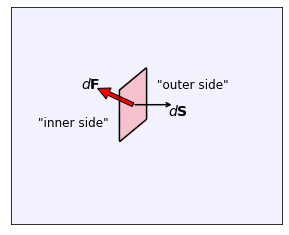

In [80]:
fig, ax = plt.subplots(figsize=(6,4)) 

x = np.arange(0, 5, 0.001)
x1 = np.arange(2, 2.5, 0.001)

ax.set_xlim(0, 5)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.annotate('', xy=(1.6,0.5), xytext=(2.25,0.2), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.fill_between(x, np.ones(len(x))*-2, np.ones(len(x))*2, facecolor='blue', alpha=0.05)
ax.fill_between(x1, 0.8*x1 - 2.1, 0.8*x1 - 1.1, facecolor='red', alpha=0.2)

ax.annotate('', xy=(2,-0.5), xytext=(2,0.51), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(2.5,-0.1), xytext=(2.5,0.9), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(1.98,0.45), xytext=(2.52,0.9), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(1.98,-0.5), xytext=(2.52,-0.05), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=1.5))
ax.annotate('', xy=(3,0.2), xytext=(2.25,0.2), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))

ax.annotate('$d\mathbf{S}$', c='black', fontsize=14, xy=(2.9,0.0))
ax.annotate('$d\mathbf{F}$', c='black', fontsize=14, xy=(1.3,0.5))
ax.annotate('"inner side"', c='black', fontsize=12, xy=(0.5,-0.2))
ax.annotate('"outer side"', c='black', fontsize=12, xy=(2.7,0.5))

plt.show()

Now we will derive the formula for the stress tensor for our Hamiltonian:
\begin{equation}
H[\phi] = \int_V \bigg\{ \underbrace{\frac{\alpha}{2}\phi^2 + \frac{\kappa}{2}\phi^4
\ + \frac{\kappa}{2}|\nabla\phi|^2}_{g(\phi,\partial_\alpha\phi)}   \bigg\}\,dV.
\end{equation}
Suppose that we have some fluid, which occupies some volume $V$ in space, as we can see in the picture below.
Now we can deform the fluid _affinely_ through some infinitesimal strain $\delta\mathbf{r}$ such that 
$\mathbf{r}\rightarrow\mathbf{r}+\delta\mathbf{r}$.
Under this _affine_ deformation, the fluid density $\phi(\mathbf{r})$ and the fluid volume $V$ transform as:
\begin{align}
\phi(\mathbf{r}) \rightarrow \phi(\mathbf{r}-\delta\mathbf{r}) = \phi(\mathbf{r}) + \delta\phi(\mathbf{r}) \quad\text{and}\quad
V &\rightarrow V + \delta V.
\end{align}
In other words, affine deformation simply translates the value of $\phi$ through space by $\delta\mathbf{r}$.
By Taylor expanding $\phi(\mathbf{r}-\delta\mathbf{r})$, we can find:
\begin{equation}
\delta\phi = -\delta\mathbf{r}\cdot\nabla\phi.
\end{equation}
Now we can calculate the change in the total energy due to this affine deformation:
\begin{align}
\delta H &= H[\phi+\delta\phi] - H[\phi] \\
&= \int_{V+\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV - \int_{V} g(\phi,\partial_\alpha\phi) \, dV \\
&= \int_{V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV 
\ + \int_{\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV
\ - \int_{V} g(\phi,\partial_\alpha\phi) \, dV
\end{align}
Now we can Taylor expand:
\begin{equation}
g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) = 
g(\phi,\partial_\alpha\phi) + \delta\phi \frac{\partial g}{\partial\phi} + (\delta\partial_\alpha\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)}
\end{equation}
In particular, the second integral becomes:
\begin{equation}
\int_{\delta V} g(\phi+\delta\phi,\partial_\alpha\phi+\delta\partial_\alpha\phi) \, dV
\simeq \int_{\delta V} g(\phi,\partial_\alpha\phi) \, dV,
\end{equation}
where we have neglected order $\sim\delta^2$.
Thus the change in the total energy is
\begin{align}
\delta H &= 
\int_{V} \bigg\{ \delta\phi \frac{\partial g}{\partial\phi} + (\partial_\alpha\delta\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)} \bigg\}\,dV
\ + \int_{\delta V} g(\phi,\partial_\alpha\phi) \, dV \\
\ &= 
\int_{V} \bigg\{ \delta\phi \frac{\partial g}{\partial\phi} + (\partial_\alpha\delta\phi) \frac{\partial g}{\partial(\partial_\alpha\phi)} \bigg\}\,dV
\ + \oint_{\partial V} g(\phi,\partial_\alpha\phi) \, \delta\mathbf{r}\cdot d\mathbf{S}.
\end{align}
Note that when you displace a surface element $d\mathbf{S}$ by $\delta\mathbf{r}$, the volume covered by this travelling surface element is $\delta\mathbf{r}\cdot d\mathbf{S}$.
Next we can use integration by parts on the first term:
\begin{align}
\delta F &= 
\int_{V} \bigg\{ 
     \frac{\partial g}{\partial\phi}
    - \partial_\alpha\left(\frac{\partial g}{\partial(\partial_\alpha\phi)}\right) \bigg\} \delta\phi \,dV
\ + \oint_{\partial V} \frac{\partial g}{\partial(\partial_\alpha\phi)} \delta\phi \, dS_\alpha
\ + \oint_{\partial V} g \delta r_\alpha  \,  dS_\alpha \\
&= 
-\int_{V} \mu \delta r_\alpha \partial_\alpha\phi \, dV
\ - \oint_{\partial V} \frac{\partial g}{\partial(\partial_\alpha\phi)} \delta r_\beta \partial_\beta\phi \, dS_\alpha
\ + \oint_{\partial V} g \delta r_\alpha  \,  dS_\alpha \\
&= 
\int_{V}  \phi \partial_\alpha(\mu \delta r_\alpha) \, dV
-\int_{\partial V} \phi \mu  \delta r_\alpha \, dS_\alpha
\ + \oint_{\partial V} \left\{ g\delta_{\alpha\beta} 
\ -  (\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}  \right\} \delta r_\alpha  \, dS_\beta \\
&= 
\int_{V}  (\phi \partial_\alpha\mu) \delta r_\alpha \, dV
\ + \oint_{\partial V} \left\{ (g - \phi\mu)\delta_{\alpha\beta} 
\ -  (\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}  \right\} \delta r_\alpha  \, dS_\beta
\end{align}
In the last line we assumed the fluid to be incompressible, _i.e._ $\partial_\alpha\delta r_\alpha=0$
Using the first law of thermodynamics, the change in energy is also equal to:
\begin{align}
\delta H = \delta W - \delta Q,
\end{align}
$\delta W$ is the work done on the system and $\delta Q$ is the heat dissipated into the environment.
Since the affine deformation is frictionless, the heat dissipation is zero and thus $\delta H = \delta W$.
From Landau-Lifshitz, the infinitesimal work is equal to stress $\times$ strain.
More formally, the strain tensor is given by $\partial_\beta\delta r_\alpha$, and the work done on the system is then given by:
\begin{equation}
\delta W = \int_V \sigma_{\alpha\beta} \partial_\beta \delta r_\alpha \, dV
= \oint_{\partial V} \sigma_{\alpha\beta} \delta r_\alpha \, dS_\beta - \int_V (\partial_\beta\sigma_{\alpha\beta}) \delta r_\alpha \, dV.
\end{equation}
Now since we have $\delta H = \delta W$, we then get
\begin{align}
\int_{V}  (\phi \partial_\alpha\mu) \delta r_\alpha \, dV
\ + \oint_{\partial V} \left\{ (g - \phi\mu)\delta_{\alpha\beta} 
\ -  (\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}  \right\} \delta r_\alpha  \, dS_\beta =
\oint_{\partial V} \sigma_{\alpha\beta} \delta r_\alpha \, dS_\beta - \int_V \sigma_{\alpha\beta} \partial_\beta\delta r_\alpha \, dV.
\end{align}
Equating the surface term, we get the stress tensor:
\begin{equation}
\sigma_{\alpha\beta} = \underbrace{(g - \phi\mu)}_{p}\delta_{\alpha\beta}  -  (\partial_\alpha\phi)\frac{\partial g}{\partial(\partial_\beta\phi)}, 
\end{equation}
where we have also identified the isotropic pressure to be $p=g-\phi\mu$.
Equating the volume term, we get the force density:
\begin{equation}
\mathbf{f} = -\phi\nabla\mu.
\end{equation}
One can also verify that $f_\alpha=\partial_\beta\sigma_{\alpha\beta}$.

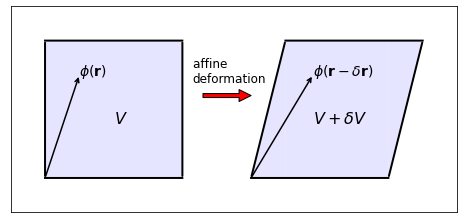

In [116]:
fig, ax = plt.subplots(figsize=(8,4)) 

x = np.arange(0.5, 2.5, 0.001)
x1 = np.arange(3.5, 4, 0.001)
x2 = np.arange(4, 5.5, 0.001)
x3 = np.arange(5.5, 6, 0.001)
x4 = np.arange(3.5, 5.5, 0.001)
x5 = np.arange(4, 6, 0.001)

ax.set_xlim(0, 6.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.fill_between(x, np.ones(len(x))*-1, np.ones(len(x))*1, facecolor='blue', alpha=0.1)
ax.fill_between(x1, np.ones(len(x1))*-1, 4*x1-15, facecolor='blue', alpha=0.1)
ax.fill_between(x2, np.ones(len(x2))*-1, np.ones(len(x2))*1, facecolor='blue', alpha=0.1)
ax.fill_between(x3, 4*x3-23, np.ones(len(x3))*1, facecolor='blue', alpha=0.1)

ax.plot(x, np.ones(len(x))*-1, c='black', linewidth=2)
ax.plot(x, np.ones(len(x))*1, c='black', linewidth=2)
ax.plot(x4, np.ones(len(x4))*-1, c='black', linewidth=2)
ax.plot(x5, np.ones(len(x5))*1, c='black', linewidth=2)

ax.annotate('', xy=(0.5,-1), xytext=(0.5,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(2.5,-1), xytext=(2.5,1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(4,1), xytext=(3.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))
ax.annotate('', xy=(6,1), xytext=(5.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='-', linewidth=2))

ax.annotate('', xy=(1,0.5), xytext=(0.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(4.4,0.5), xytext=(3.5,-1), arrowprops=dict(edgecolor='black', arrowstyle='->', linewidth=1.5))

ax.annotate('', xy=(3.5,0.2), xytext=(2.8,0.2), arrowprops=dict(edgecolor='black', facecolor='red'))

ax.annotate('$\phi(\mathbf{r})$', c='black', fontsize=14, xy=(1,0.5))
ax.annotate('$\phi(\mathbf{r}-\delta\mathbf{r})$', c='black', fontsize=14, xy=(4.4,0.5))
ax.annotate('$V$', c='black', fontsize=16, xy=(1.5,-0.2))
ax.annotate('$V+\delta V$', c='black', fontsize=16, xy=(4.4,-0.2))
ax.annotate('affine \ndeformation', c='black', fontsize=12, xy=(2.65,0.4))

plt.show()

References:
1. L.D. Landau and E. M. Lifshitz, Theory of Elasticity, 3rd Edition, Elsevier.